# RSA Implementation

In [1]:
import sys
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Algorithms/RSA')
from RSAClassical import *
from SetupRSAInference import *
from visualizationRSA import *
from RSAExtensionsForAction import SpeakerActionSignalDistribution, SpeakerActionSignalDistribution_NoReceiverCost

sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Experiment')
from visualizations_Experiment import visualizeExperimentTrial

# RSA Experimental Conditions


In [42]:
# Scenario setups
s = (4,0)
r = (4,7)

signalSpace_GC = ['green', 'circle']
signalSpace_PT = ['purple', 'triangle']

targetDict_GtGcPc = {(0,7): 'green triangle', (4,3):'green circle' , (8,7):'purple circle'}
targetDict_GcGtPc = {(0,7): 'green circle', (4,3):'green triangle' , (8,7):'purple circle'}
targetDict_GtPcGc = {(0,7): 'green triangle', (4,3):'purple circle' , (8,7):'green circle'}
targetDict_PcGtGc = {(0,7): 'purple circle', (4,3):'green triangle' , (8,7):'green circle'}

targetDict_PcGtPtGc = {(0,7): 'purple circle', (4,3):'green triangle' , (7,6): 'purple triangle', (8,7):'green circle'}

uniformPrior_3Item = {item : 1.0/3 for item in targetDict_GtGcPc.values()}
uniformPrior_4Item = {item : 1.0/4 for item in targetDict_PcGtPtGc.values()}

rationality = 4
reward = 15

gridDims = (9,10)

In [43]:
performRSAListenerInference = SetupExperiment_RSAListenerInference(rationality)
performRSASpeakerInference = SetupExperiment_RSASpeakerInference(rationality)
performRSASpeakerActionInference = SetupExperiment_RSASpeakerWithActionChoice(rationality, reward)

In [44]:
l0_PT, pragListener_PT = performRSAListenerInference(uniformPrior_3Item, signalSpace_PT,1,True)
s0_PT, pragSpeaker_PT = performRSASpeakerInference(uniformPrior_3Item, signalSpace_PT,1,True)

l0_GC, pragListener_GC = performRSAListenerInference(uniformPrior_3Item, signalSpace_GC,1,True)
s0_GC, pragSpeaker_GC = performRSASpeakerInference(uniformPrior_3Item, signalSpace_GC,1,True)

l0_4Item,pragListener_4Item = performRSAListenerInference(uniformPrior_4Item, signalSpace_PT,1,True)
s0_4Item,pragSpeaker_4Item = performRSASpeakerInference(uniformPrior_4Item, signalSpace_PT,1,True)

In [50]:
sa0_PT, sa1_PT = performRSASpeakerActionInference(targetPrior=uniformPrior_3Item, 
                                                  signalSpace=signalSpace_PT, 
                                                  targetDictionary=targetDict_GtGcPc, 
                                                  signalerLocation=s, 
                                                  receiverLocation=r, 
                                                  maxLayer = 1, 
                                                  getAllLayers = True)

sa0_GC, sa1_GC = performRSASpeakerActionInference(targetPrior=uniformPrior_3Item, 
                                                  signalSpace=signalSpace_GC, 
                                                  targetDictionary=targetDict_GcGtPc, 
                                                  signalerLocation=s, 
                                                  receiverLocation=r, 
                                                  maxLayer = 1, 
                                                  getAllLayers = True)

# Condition 1 : Baseline
- Target:Green Triangle

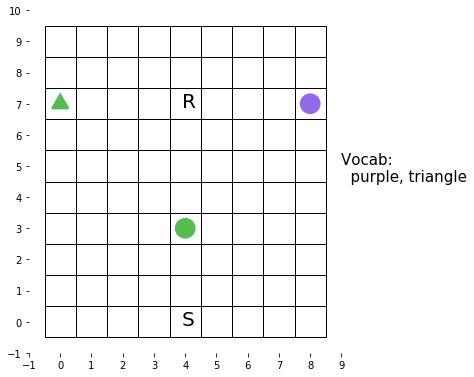

In [6]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_PT, targetDict_GtGcPc, True)

In [7]:
l0_PT('triangle')

,l0(w|msg)
intentions,
green circle,0.0
green triangle,1.0
purple circle,0.0


In [8]:
pragSpeaker_PT('green triangle')

,s1(msg|w)
signals,
triangle,1.000000e+00
purple,1.000000e-144


In [9]:
listenerS1 = pragListener_PT('triangle')
listenerS1.round(3)

,l1(w|msg)
intentions,
green circle,0.333
green triangle,0.667
purple circle,0.000


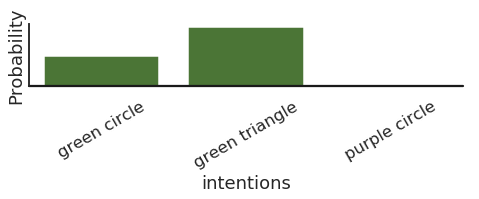

In [10]:
plotListenerActionDistribution(listenerS1)

In [11]:
s0_PT('green triangle')

,s0(msg|w)
signals,
triangle,1.000000e+00
purple,1.000000e-36


In [13]:
speakerS1 = pragSpeaker_PT('green triangle')
speakerS1

,s1(msg|w)
signals,
triangle,1.000000e+00
purple,1.000000e-144


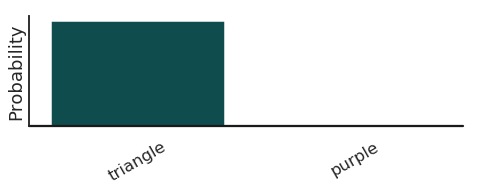

In [14]:
plotSignalerActionDistribution(speakerS1)

In [48]:
sa0_PT('green triangle')

,probability
signals,
purple,8.756511e-27
triangle,1.000000e+00
green triangle,6.914400e-13


In [49]:
sa1_PT('green triangle')

,probability
signals,
purple,4.246930e-18
triangle,9.996646e-01
green triangle,3.353501e-04


# Condition 2: Utility Not Enough
- Target: Purple Circle

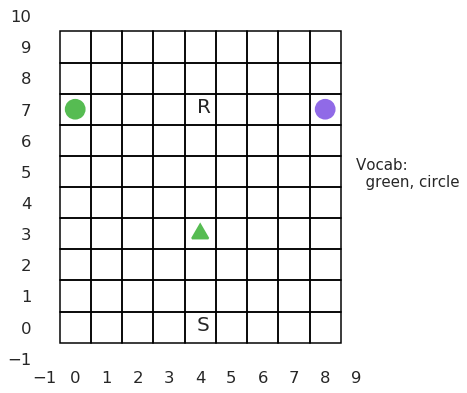

In [15]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_GC, targetDict_GcGtPc)

In [16]:
listenerS2 = pragListener_GC('circle')
listenerS2

,l1(w|msg)
intentions,
green circle,3.333333e-01
green triangle,1.066667e-35
purple circle,6.666667e-01


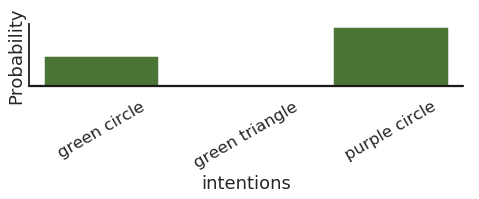

In [17]:
plotListenerActionDistribution(listenerS2)

In [18]:
pragSpeaker_GC('purple circle')

,s1(msg|w)
signals,
circle,1.000000e+00
green,1.000000e-144


In [19]:
getSpeakerDistribution_c2 = SpeakerActionSignalDistribution(getPragmaticSpeaker = pragSpeaker_GC, 
                                getPragmaticReceiver=pragListener_GC, 
                                targetDictionary=targetDict_GcGtPc, 
                                signalerLocation=s, 
                                receiverLocation=r, 
                                rationality=rationality, 
                                valueOfReward=reward, 
                                getActionCost=calculateLocationCost_TaxicabMetric)

In [20]:
speakerS2= getSpeakerDistribution_c2('purple circle')
speakerS2

,probability
signals,
circle,9.996646e-01
green,4.246930e-18
purple circle,3.353501e-04


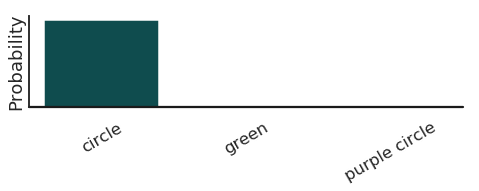

In [21]:
plotSignalerActionDistribution(speakerS2)

In [22]:
speakerS2

,probability
signals,
circle,9.996646e-01
green,4.246930e-18
purple circle,3.353501e-04


# Condition 3: Pragmatics Not Enough
- Target: Green Circle

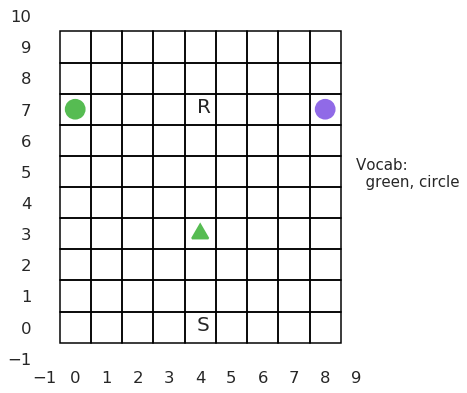

In [23]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_GC, targetDict_GcGtPc)

In [24]:
listenerS3 = pragListener_GC('green')
listenerS3

,l1(w|msg)
intentions,
green circle,3.333333e-01
green triangle,6.666667e-01
purple circle,1.066667e-35


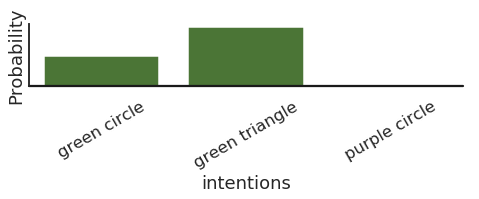

In [25]:
plotListenerActionDistribution(listenerS3)

In [26]:
pragSpeaker_GC('green circle')

,s1(msg|w)
signals,
circle,0.5
green,0.5


In [27]:
# signaling and action probabilities

In [28]:
getSpeakerDistribution_c3 = SpeakerActionSignalDistribution(getPragmaticSpeaker = pragSpeaker_GC, 
                                getPragmaticReceiver=pragListener_GC, 
                                targetDictionary=targetDict_GcGtPc, 
                                signalerLocation=s, 
                                receiverLocation=r, 
                                rationality=rationality, 
                                valueOfReward=reward, 
                                getActionCost=calculateLocationCost_TaxicabMetric)

In [29]:
speakerS3 = getSpeakerDistribution_c3('green circle')
speakerS3

,probability
signals,
circle,0.000006
green,0.000006
green circle,0.999988


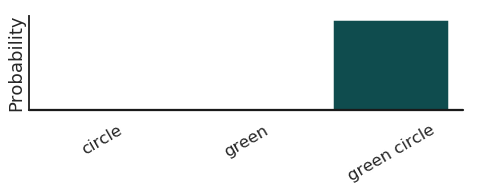

In [30]:
plotSignalerActionDistribution(speakerS3)

# Condition 4: Neither Alone is Enough
- Target: Purple Circle

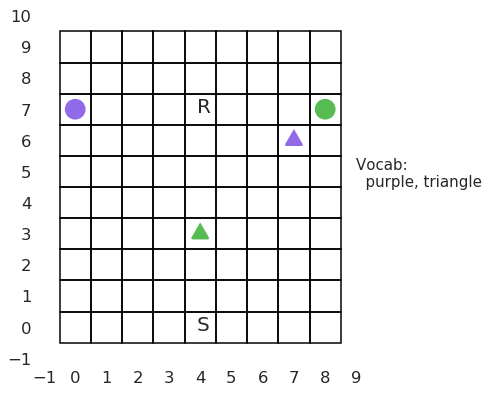

In [31]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_PT, targetDict_PcGtPtGc) 

In [32]:
listenerS4 = pragListener_4Item('purple')
listenerS4.round(4)

,l1(w|msg)
intentions,
green circle,0.25
purple triangle,0.25
green triangle,0.00
purple circle,0.50


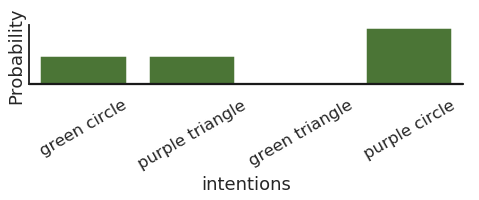

In [33]:
plotListenerActionDistribution(listenerS4)

In [34]:
pragSpeaker_4Item('purple circle')

,s1(msg|w)
signals,
triangle,1.000000e-144
purple,1.000000e+00


In [35]:
getSpeakerDistribution_c4 = SpeakerActionSignalDistribution(getPragmaticSpeaker = pragSpeaker_4Item, 
                                getPragmaticReceiver=pragListener_4Item, 
                                targetDictionary=targetDict_PcGtPtGc, 
                                signalerLocation=s, 
                                receiverLocation=r, 
                                rationality=rationality, 
                                valueOfReward=reward, 
                                getActionCost=calculateLocationCost_TaxicabMetric)

In [36]:
speakerS4 = getSpeakerDistribution_c4('purple circle')
speakerS4

,probability
signals,
purple,1.192029e-01
triangle,1.115456e-14
purple circle,8.807971e-01


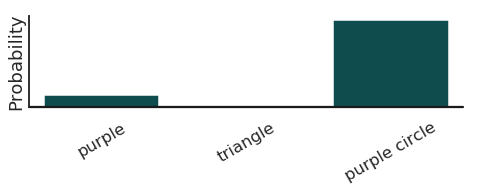

In [37]:
plotSignalerActionDistribution(speakerS4)